<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/09_GMMExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

In [2]:
def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()

In [3]:
def plot_samples(projected, labels, title):
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)


[0.14890594 0.13618771]
(1797, 64)
(1797, 2)


<ipython-input-3-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-3-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,


[0.12113589 0.08598196 0.14646071 0.12585235 0.09194652 0.09442745
 0.06500233 0.05179239 0.14220328 0.07519713]
[[ -4.67230425   1.31679921]
 [ 15.59773544  13.43407213]
 [  0.30993394 -18.4219397 ]
 [-14.92546272  11.20644548]
 [  1.7162734   21.89124543]
 [-12.32297654  -7.21968536]
 [ 15.96244079  -6.25376167]
 [-21.98324635   2.14714383]
 [  2.38858115  -8.99935523]
 [ 24.26951942   2.88690628]]


<ipython-input-3-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-3-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,


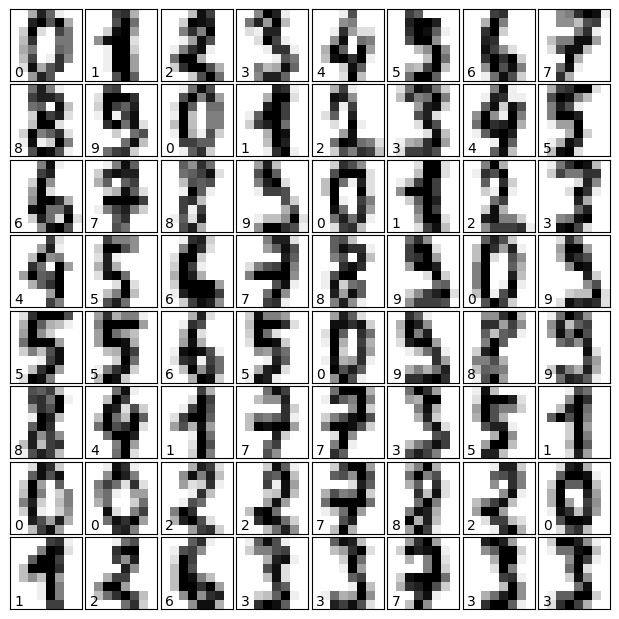

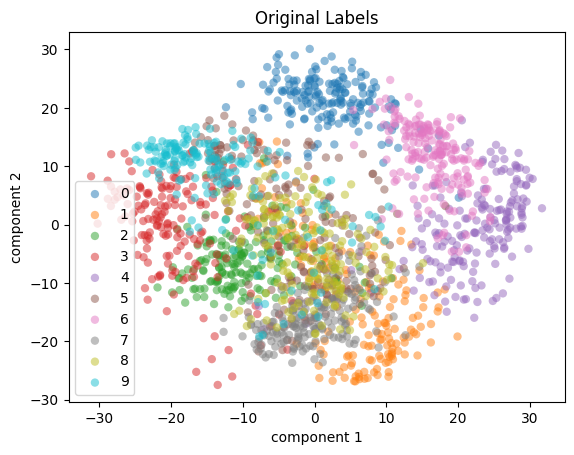

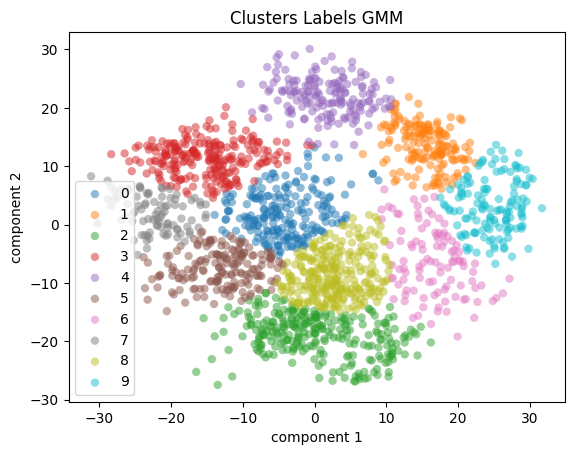

In [4]:
digits = load_digits()
show_digitsdataset(digits)

#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(pca.explained_variance_ratio_)
print(digits.data.shape)
print(projected.shape)
plot_samples(projected, digits.target, 'Original Labels')

#Applying sklearn GMM function
gm  = GaussianMixture(n_components=10).fit(projected)
print(gm.weights_)
print(gm.means_)
x = gm.predict(projected)

#Visualize the results sklearn
plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()